In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Projet Machine Learning M2 MIAGE

###Groupe : Ranting ZHAO, Meganne SOUPRAYEN, Jenny TAING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##1. Analyse et traitement des données

In [ ]:
# On met dans un dataFrame 'movie_df' les données contenues dans le fichier "movie_metadata.pkl"
# "movie_metadata.pkl" contient des informations détaillées sur les films, par exemple les genres,
# les acteurs et les réalisateurs
movie_data = pd.read_pickle("/content/drive/MyDrive/M2/projet ML/movie_metadata.pkl")
movie_df = pd.DataFrame(movie_data)

#  On vérifie qu'il ne manque aucune données
NB_MOVIES = len(movie_df.columns)

print(f"Il manque {sum(movie_df.isnull().all())} donnée(s) à 'movie_df' et il y a {sum(movie_df.T.index.duplicated())} duplication(s).\n")

print(f"Il y a {NB_MOVIES} films, et pour chaque film on a des informations sur :")
for e in movie_df.index:
    print(f" - {e}")

movie_df

Il manque 0 donnée(s) à 'movie_df' et il y a 0 duplication(s).

Il y a 528 films, et pour chaque film on a des informations sur :
 - director
 - genre
 - actors
 - title


,tt0305224,tt0245046,tt0185125,tt0196229,tt0308644,tt0282687,tt0128442,tt0335245,tt0261392,tt0290002,...,tt0385307,tt0185431,tt0323298,tt0337563,tt0317198,tt0203019,tt0169547,tt0227538,tt0374536,tt0361862
director,Peter Segal,Gillian Armstrong,Pedro Almodóvar,Ben Stiller,Marc Forster,Stephen Herek,John Dahl,Ethan Coen Joel Coen,Kevin Smith,Jay Roach,...,John Pasquin,Steven Brill,Roger Michell,Gary Winick,Beeban Kidron,George Tillman Jr.,Sam Mendes,Robert Rodriguez,Nora Ephron,Brad Anderson
genre,[Comedy],"[Drama, Romance, Thriller]",[Drama],[Comedy],"[Biography, Drama, Family]","[Comedy, Romance]","[Crime, Drama]","[Comedy, Crime, Thriller]",[Comedy],"[Comedy, Romance]",...,"[Action, Comedy, Crime]","[Comedy, Fantasy]","[Drama, Romance]","[Comedy, Fantasy, Romance]","[Comedy, Drama, Romance]","[Biography, Drama]","[Drama, Romance]","[Action, Adventure, Comedy]","[Comedy, Fantasy, Romance]","[Drama, Thriller]"
actors,"[Jack Nicholson, Adam Sandler, Marisa Tomei, W...","[Cate Blanchett, James Fleet, Abigail Cruttenden]","[Cecilia Roth, Marisa Paredes, Candela Peña, P...","[Ben Stiller, Owen Wilson, Christine Taylor, W...","[Johnny Depp, Kate Winslet, Julie Christie, Du...","[Angelina Jolie, Edward Burns, Tony Shalhoub, ...","[Matt Damon, Edward Norton, Gretchen Mol, John...","[Tom Hanks, Marlon Wayans, Irma P. Hall]","[Jason Mewes, Kevin Smith, Ben Affleck, Ali La...","[Ben Stiller, Robert De Niro, Blythe Danner, D...",...,"[Sandra Bullock, Regina King, William Shatner,...","[Adam Sandler, Patricia Arquette, Harvey Keite...","[Daniel Craig, Anna Wilson-Jones, Anne Reid, P...","[Jennifer Garner, Mark Ruffalo, Judy Greer, Ly...","[Renée Zellweger, Colin Firth, Hugh Grant, Jim...","[Cuba Gooding Jr., Robert De Niro, Charlize Th...","[Kevin Spacey, Annette Bening, Thora Birch, We...","[Alexa PenaVega, Daryl Sabara, Antonio Banderas]","[Nicole Kidman, Will Ferrell, Shirley MacLaine...","[Christian Bale, Jennifer Jason Leigh, Aitana ..."
title,Anger Management,Charlotte Gray,All About My Mother,Zoolander,Finding Neverland,Life or Something Like It,Rounders,The Ladykillers,Jay and Silent Bob Strike Back,Meet the Fockers,...,Miss Congeniality 2: Armed and Fabulous,Little Nicky,The Mother,13 Going on 30,Bridget Jones: The Edge of Reason,Men of Honor,American Beauty,Spy Kids,Bewitched,The Machinist


In [ ]:
# On met dans un dataFrame 'rating_df' les données contenues dans le fichier "movie_ratings_500_id.pkl"
# "movie_ratings_500_id.pkl" contient les interactions entre les utilisateurs et les films
rating_data = pd.read_pickle("/content/drive/MyDrive/M2/projet ML/movie_ratings_500_id.pkl")

res= []
for film, ratings in rating_data.items():
    for info in ratings:
        info['movie_id'] = film
        del info['user_rating_date']
        res.append(info)
rating_df = pd.DataFrame(res)

rating_df = pd.DataFrame(res)

#  On vérifie qu'il ne manque aucune données
NB_USERS = len(rating_df['user_id'].unique())
NB_RATINGS = len(rating_df)

print(f"Il manque {sum(movie_df.isnull().all(axis=1))} donnée(s) à 'rating_df' et il y a {sum(rating_df.index.duplicated())} duplication(s).\n")
print(f"Il y a {NB_USERS} utilisateurs différentes qui ont noté au moins un film.\n")
print(f"Il y a {NB_RATINGS} notes de film, et pour chaque note on a des informations sur :")
for e in rating_df.columns:
    print(f" - {e}")

rating_df


Il manque 0 donnée(s) à 'rating_df' et il y a 0 duplication(s).

Il y a 36968 utilisateurs différentes qui ont noté au moins un film.

Il y a 259818 notes de film, et pour chaque note on a des informations sur :
 - user_rating
 - user_id
 - movie_id


,user_rating,user_id,movie_id
0,4,1380819,tt0305224
1,3,185150,tt0305224
2,4,1351377,tt0305224
3,2,386143,tt0305224
4,3,2173336,tt0305224
...,...,...,...
259813,5,1139877,tt0361862
259814,4,1460015,tt0361862
259815,5,1098265,tt0361862
259816,4,1962894,tt0361862


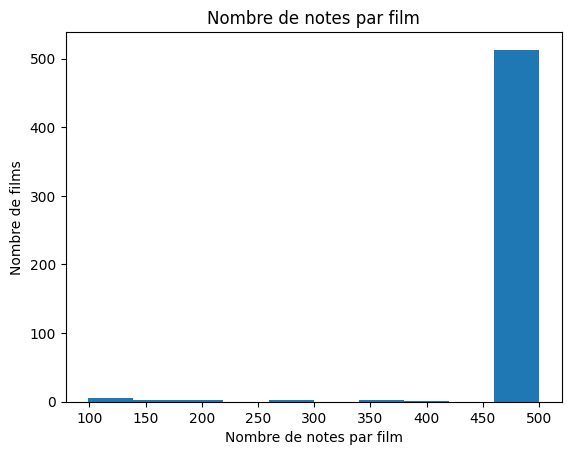

In [ ]:
# On compte combien de fois chaque film a été noté
nbNote_par_film = rating_df["movie_id"].value_counts()
nbNote_par_film.plot(kind='hist')
plt.title('Nombre de notes par film')
plt.xlabel('Nombre de notes par film')
plt.ylabel('Nombre de films')
plt.show()

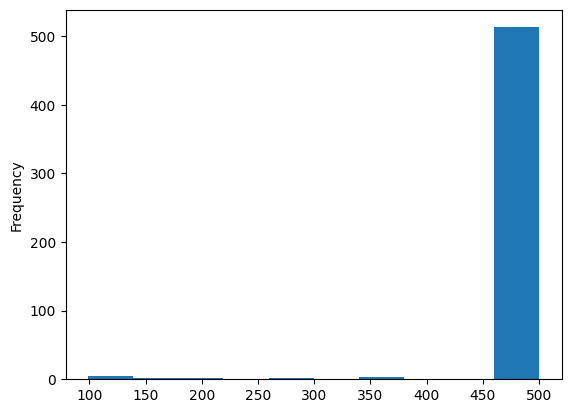

In [ ]:
# On compte combien de film chaque personne a noté
nbNote_par_user = rating_df["user_id"].value_counts()
nbNote_par_film.plot(kind='hist')
plt.show()

##2. Models de recommendation

### 2.1. Notre premier modèle : SVD

In [ ]:
def train_test_data(df, NB_MOVIES, NB_RATINGS):
  np.random.seed(0)
  indices = np.random.choice(np.arange(NB_RATINGS),size=int(NB_RATINGS*0.2), replace=False)
  train = df.copy()
  test = df.loc[indices].copy()
  return train, test

train, test = train_test_data(rating_df, NB_MOVIES, NB_RATINGS)

In [ ]:
train_m = train.pivot(index='user_id', columns='movie_id', values='user_rating')

nb_trou = train_m.isna().sum().sum()
n, d = np.shape(train_m.to_numpy())
print(f"La spacité de la matrice de train : {nb_trou/(n*d)*100}")

train_m = train_m.fillna(0)
train_m = train_m.applymap(int)
train_m

La spacité de la matrice de train : 98.66890406444885


movie_id,tt0118661,tt0118715,tt0118744,tt0118863,tt0119079,tt0119099,tt0119223,tt0119269,tt0119305,tt0119313,...,tt0379889,tt0382077,tt0383534,tt0384533,tt0385267,tt0385307,tt0388973,tt0395169,tt0401792,tt0405159
user_id,,,,,,,,,,,,,,,,,,,,,
1000192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
1000433,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_m = test.pivot(index='user_id', columns='movie_id', values='user_rating')

nb_trou = test_m.isna().sum().sum()
n, d = np.shape(test_m.to_numpy())
print(f"La spacité de la matrice de test : {nb_trou/(n*d)*100}")

test_m = test_m.fillna(0)
test_m = test_m.applymap(int)
test_m

La spacité de la matrice de test : 99.36804229931758


movie_id,tt0118661,tt0118715,tt0118744,tt0118863,tt0119079,tt0119099,tt0119223,tt0119269,tt0119305,tt0119313,...,tt0379889,tt0382077,tt0383534,tt0384533,tt0385267,tt0385307,tt0388973,tt0395169,tt0401792,tt0405159
user_id,,,,,,,,,,,,,,,,,,,,,
1000460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998865,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
998966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rating_train = train_m.values
rating_test = test_m.values

In [ ]:
U, Sigma, Vt = np.linalg.svd(rating_train, full_matrices=False)
Sigma = np.diag(Sigma)
R_train_pred = np.dot(np.dot(U,Sigma), Vt)
# R_train_pred = np.dot(U,Vt)

In [ ]:
def prediction_error(test, U, Vt):
  rating_test_pred = {}
  rmse_error = 0
  mae_error = 0
  for indice in range(len(test)):
    rating, user_id, movie_id = test.iloc[indice]
    u = list(test_m.index).index(user_id)
    m = list(test_m.columns).index(movie_id)

    pred = np.dot(U[u], Vt[m])
    rating_test_pred.setdefault(user_id, {})
    rating_test_pred[user_id][movie_id] = pred

    err = float(rating)-pred
    rmse_error += pow(err, 2)
    mae_error += abs(err)

  return rating_test_pred, sqrt(rmse_error/len(test)), mae_error/len(test)
prediction,rmse, mae = prediction_error(test, U, Vt)

# On s'attend à voir un RSME élevé car on a beaucoup de case vide
print(f"L'erreur RMSE : {rmse}")
print(f"L'erreur MAE : {mae}")

In [ ]:
user_id = '1502634'

#  On détermine les 10 meilleurs films pour un utilisateur donné
def recommendation_list(user_id, test_m, R_train_pred, rating_df):
  u = list(test_m.index).index(user_id)

  indices = np.argsort(R_train_pred[u])[::-1]
  list_movies = test_m.columns[indices]

  list_movies_seen = rating_df[rating_df.user_id==user_id].movie_id.unique()
  liste = []
  nb = 0
  while nb<10 or nb>=528:
    if (list_movies[nb] in list_movies_seen):
      nb += 1
      continue
    liste.append(list_movies[nb])
    nb += 1
  return liste

recommendations_list = recommendation_list(user_id, test_m, R_train_pred, rating_df)
movie_df.iloc[3][recommendations_list]

## 3. Baselines

###3.1. User-Based Collaborative Filtering

In [ ]:
from math import *

#create a new dictionary
user_rating = {}
user_rating = rating_df.pivot(index='user_id', columns='movie_id', values='user_rating')

#distance eucludienne entre 2 users
def Euclidean(user1, user2):
    user1_data = user_rating[user1]
    user2_data = user_rating[user2]
    distance = 0
    for key in user1_data.keys():
        if key in user2_data.keys():
           distance += pow(float(user1_data[key]) - float(user2_data[key]), 2)

    return 1 / (1 + sqrt(distance))

#similarity
def top_simliar(userID):
    res = []
    for userid in user_rating.keys():
        if not userid == userID :
            simliar = Euclidean(userID, userid)
            res.append((userid, simliar))
    res.sort(key=lambda val: val[1])
    return res[:4]


getIdFlag = 0
while not getIdFlag:
    inputUid = str(input("please entre useID\n"))
    try:
        uid = user_rating[inputUid]
        getIdFlag = 1
    except Exception:
        print("useID is wrong, please entre again\n")


#recommand 10 movies which are not watched
def recommend(user):
    top_sim_user = top_simliar(user)[0][0]
    items = user_rating[top_sim_user]
    recommendations = []
    for item in items.keys():
        if item not in user_rating[user].keys():
            recommendations.append((item, items[item]))
    recommendations.sort(key=lambda val: val[1], reverse=True)
    return recommendations[:10]


Recommendations = recommend(inputUid)
print("recommand for" + inputUid + "10 movies:\n")
for video in Recommendations:
    print(video)


## 4. Autre méthode

###4.1. Selon la notation moyenne des utilisateurs

In [ ]:
import pandas as pd

# df avec les informations de chaque film
df = pd.read_pickle('/content/drive/MyDrive/M2/projet ML/movie_metadata.pkl')
df = pd.DataFrame.from_dict(df, orient='index')

In [ ]:
# df avec les notes données par les utilisateurs
df2 = pd.read_pickle('/content/drive/MyDrive/M2/projet ML/movie_ratings_500_id.pkl')
df2 = pd.DataFrame.from_dict(df2, orient='index')

nblines, nbcol = df2.shape
listusers = [] # Liste des utilisateurs

In [ ]:
user_id = '1380819' # L'utilisateur qui souhaite avoir une recommandation
film = [] # Films qu'il a visionné
ratinguser = [] # La note attribuée aux films

for i in range (nblines):
  for j in range (nbcol):
    cell_value = df2[j].iloc[i] # Parcourir tout df des films notés

    if cell_value is not None:
      cell_value_user = cell_value.get('user_id') # Récupérer l'user id

      if cell_value_user not in listusers:
        listusers.append(cell_value_user) # Remplir la liste des différents utilisateurs

      if cell_value_user == user_id:
        film.append(df2.index[i]) # Récupérer les films visionnés
        ratinguser.append(cell_value.get('user_rating')) # Notes associées

In [ ]:
df_user = pd.DataFrame() # Créer le df de l'utilisateur avec les colonnes films et rating
df_user['film'] = film
df_user['rating'] = ratinguser

# Jointure avec les df pour obtenir les informations des films qu'il a visionné
df_user = pd.merge(df_user, df, left_on='film', right_index=True, how='inner')
list_recommend_films = [] # Création d'une liste contenant les films recommandés

df_user

,film,rating,director,genre,actors,title
0,tt0305224,4,Peter Segal,[Comedy],"[Jack Nicholson, Adam Sandler, Marisa Tomei, W...",Anger Management
1,tt0196229,5,Ben Stiller,[Comedy],"[Ben Stiller, Owen Wilson, Christine Taylor, W...",Zoolander
2,tt0261392,4,Kevin Smith,[Comedy],"[Jason Mewes, Kevin Smith, Ben Affleck, Ali La...",Jay and Silent Bob Strike Back
3,tt0279113,4,Miguel Arteta,"[Drama, Romance]","[Jennifer Aniston, Jake Gyllenhaal, Deborah Ru...",The Good Girl
4,tt0237534,5,Christophe Gans,"[Action, Adventure, Drama]","[Samuel Le Bihan, Mark Dacascos, Jérémie Renie...",Brotherhood of the Wolf
...,...,...,...,...,...,...
128,tt0137494,3,Jon Amiel,"[Action, Crime, Romance]","[Sean Connery, Catherine Zeta-Jones, Ving Rham...",Entrapment
129,tt0337563,3,Gary Winick,"[Comedy, Fantasy, Romance]","[Jennifer Garner, Mark Ruffalo, Judy Greer, Ly...",13 Going on 30
130,tt0203019,4,George Tillman Jr.,"[Biography, Drama]","[Cuba Gooding Jr., Robert De Niro, Charlize Th...",Men of Honor
131,tt0169547,3,Sam Mendes,"[Drama, Romance]","[Kevin Spacey, Annette Bening, Thora Birch, We...",American Beauty


In [ ]:
# Récupérer l'ensemble des films visionnés par les autres utilisateurs

import random
rdm = random.randint(0, 35968) # Prendre un échantillon aléatoire de 1000 utilisateurs
for l in range (rdm,rdm+1000):
  k = listusers[l]

  ratinguser2 = []
  film2 = []
  for i in range (nblines):
    for j in range (nbcol):
      cell_value = df2[j].iloc[i]

      if cell_value is not None:
        cell_value_user = cell_value.get('user_id')
        if cell_value_user == k:
          ratinguser2.append(cell_value.get('user_rating'))
          film2.append(df2.index[i])

  df_user2 = pd.DataFrame()
  df_user2['film'] = film2
  df_user2['rating'] = ratinguser2
  df_user2['rating'] = pd.to_numeric(df_user2['rating'])
  rating_2users = pd.merge(df_user, df_user2, on='film', how='inner') # Films vus en commun

# Vérifier si les utilisateurs on les mêmes goûts : écart moyen des notes < 1.5
  if not rating_2users.empty:
    rating_2users['rating_x'] = pd.to_numeric(rating_2users['rating_x'])
    rating_2users['rating_y'] = pd.to_numeric(rating_2users['rating_y'])
    ecart_moyen = (rating_2users['rating_x'] - rating_2users['rating_y']).abs().mean()

    if ecart_moyen < 1.5 : # Dans le cas où les utilisateurs on les mêmes goûts
      for i in range (df_user2.shape[0]):
        if not df_user2.at[i,'film'] in df_user['film'].values : # Si l'utilisateur n'a pas regardé un film que l'autre utilisateur a regardé
          if df_user2.at[i,'rating'] > 3: # Si l'autre utilisateur a donné une bonne note au film (4 ou 5)
            list_recommend_films.append(df_user2.at[i,'film']) # Ajouter dans la liste des films recommandés
#list_recommend_films

In [ ]:
from collections import Counter

# Compter le nombre de fois qu'un même film figure dans la liste de recommandations
compteur_occurrences = Counter(list_recommend_films)
# Classement par ordre décroissant et récupérer les 10 meilleures
occurrences_classees = compteur_occurrences.most_common(10)

# Récupérer titres des films recommandés
film_chose = [valeur for valeur, _ in occurrences_classees]
df_film_chose = pd.DataFrame()
df_film_chose['ref']=film_chose
df_film_chose = pd.merge(df_film_chose, df, left_on='ref', right_index=True, how='inner')
df_film_chose['title']

0               The Green Mile
1            Road to Perdition
2          Million Dollar Baby
3          Remember the Titans
4               Shall We Dance
5            Gangs of New York
6    The Passion of the Christ
7             We Were Soldiers
8                 Runaway Jury
9             A Beautiful Mind
Name: title, dtype: object